# Download and upload sequestration results
---
by Eric Giger

Data Submission Technician at the Center for Translational Data Science at the University of Chicago

December 2022

---
This Jupyter notebook will walk through how to install and operate the gen3-client in order to download and upload file objects.  
* Download unprocessed metadata from [ValidateStaging](https://validatestaging.midrc.org/)
* Upload completed results to [ValidateStaging](https://validatestaging.midrc.org/)

---
### [Instructions for downloading and uploading files using the gen3-client](https://gen3.org/resources/user/gen3-client/)
 * [Configure a profile with credentials](https://gen3.org/resources/user/gen3-client/#2-configure-a-profile-with-credentials)
 * [Upload data files](https://gen3.org/resources/user/gen3-client/#3-upload-data-files)
 * [Download data files using a GUID](https://gen3.org/resources/user/gen3-client/#4-download-a-single-data-file-using-a-guid)

In [ ]:
# Import Python Packages and scripts
import pandas as pd
import sys, os, copy, datetime

## Part 0: Getting Started with the gen3-client
---
1. Download the (latest) gen3-client from github: https://github.com/uc-cdis/cdis-data-client/releases
2. Unzip the archive.
3. Add the unzipped executable to a directory, for example: `~/.gen3/gen3-client.exe`.


In [ ]:
# # Add the directory containing the executable to your Path environment variable
# os.system("echo 'export PATH=$PATH:~/.gen3' >> ~/.bash_profile")
# os.system("source ~/.bash_profile") # you can run this or restart your terminal

# # Now you can execute the program by opening a terminal window and entering the command gen3-client.

### Configure your profile
Before using the gen3-client to upload or download data, the gen3-client needs to be configured with API credentials downloaded from the user’s data commons Profile (e.g., https://validatestaging.midrc.org/identity).

By default, the API credentials will have the name `credentials.json`. We'd recommend renaming the file to reflect the data commons from which it was downloaded. For example, I would name the credentials I download from https://validatestaging.midrc.org as _"midrc-validatestaging-credentials.json"_.  
\
Of course, please use any naming convention that is most convenient for you :D 

Example Usage: \
`gen3-client configure --profile=profile_name --cred=credentials.json --apiendpoint=api_endpoint_url`



In [ ]:
profile="midrc-validatestaging"
# insert file path to your credentials.json file
# example: cred = "/Users/my_username/Downloads/midrc-validatestaging-credentials.json"
cred=""
api="https://validatestaging.midrc.org"

os.system("gen3-client configure --profile={} --cred={} --apiendpoint={}".format(profile,cred,api))

To confirm you successfully configured a profile with the correct authorization privileges, you can run the `gen3-client auth` command, which should list your access privileges for each project in the commons you have access to.

In [ ]:
os.system("gen3-client auth --profile={}".format(profile))

## Part 1: Download Files
---
The Gen3-MIDRC team will be uploading metadata files to [ValidateStaging](https://validatestaging.midrc.org/). 

By uploading to MIDRC's object storage, the unprocessed metadata TSV files will be assigned a unique, 128-bit ID called a ‘GUID’, which stands for “globally unique identifier”. GUIDs are generated by the system software, not provided by users, and they are stored in the property `object_id` of a data_file’s structured data.

Files with a valid storage location in the file index database (AKA **indexd**) can be downloaded using the `gen3-client download-single` command by providing the file’s object_id (AKA `GUID` or `did`).

---
### Using the gen3-client

#### Required Flags:
* `--profile`: The user profile specifying the api-endpoint and credentials.
* `--guid`: The Globally Unique ID (or “object_id” in Postgres or “did” in indexd) of the file.

#### Optional Flags:

* `--download-path`: Specify the directory to store files in.

* `--filename-format`: The format of filename to be used, including “original”, “guid” and “combined” (default “original”).

* `--no-prompt`: If set to true, no user prompt message will be displayed regarding the filename-format.

* `--protocol`: The protocol to use for file download. Accepted options are: “s3”, “http”, “ftp”, “https”, and “gs”.

* `--rename`: If `--filename-format=original` is used, this will rename files by appending a counter value to its filename when files with the same name are in the download-path, otherwise the original filename will be used.

* `--skip-completed`: If set to true, the name and size of local files in the download-path are compared to the information in the file index database. If a local file in the download-path matches both the name and size, it will not be downloaded.
> _NOTE: The `--skip-completed` option also attempts to resume downloading partially downloaded files using a ranged download. That is, if a local file with the same name exists in the download-path, but the size does not match what is in the file index, the client will attempt to resume the download where it left off._

Example Usage:

`gen3-client download-single --profile=demo --guid=dg.MD1R/XXXXXX-XXXX-XXXX-XXXX-XXXXXXXXXXXX --no-prompt=True --skip-completed
`

In [ ]:
profile="midrc-validatestaging"

# enter the GUID here
# example: object_id="dg.MD1R/XXXXXX-XXXX-XXXX-XXXX-XXXXXXXXXXXX"
object_id=""

# enter where you want to download the file
# example: download_path="/Users/my_username/Documents/data/
download_path=""

# Download the file 
os.system("gen3-client download-single --profile={} --guid={} --download-path={} --no-prompt=True --skip-completed".format(profile,object_id,download_path))

## Part 2: Upload Completed Results

`gen3-client upload --profile=demo --upload-path=test.txt`

In [ ]:
profile="midrc-validatestaging"

# enter the file path of your completed results here
# example: file_path="/Users/my_username/Documents/data/completed_results/COMPLETED_sequestration_data_ORG_DATE.tsv"
file_path=""

os.system("gen3-client upload --profile={} --upload-path={}".format(profile,file_path))

In order for the Gen3 team to be able to download the completed sequestration results, the file object must be mapped to a particular project and an associated core_metdata_collections node. 

### Map uploaded files to a data file node

- For more information: https://gen3.org/resources/user/submit-data/#3-map-uploaded-files-to-a-data-file-node
---
In MIDRC, the `/submission` endpoint is hidden from the UI. To map files, login and navigate to https://validatestaging.midrc.org/submission/files


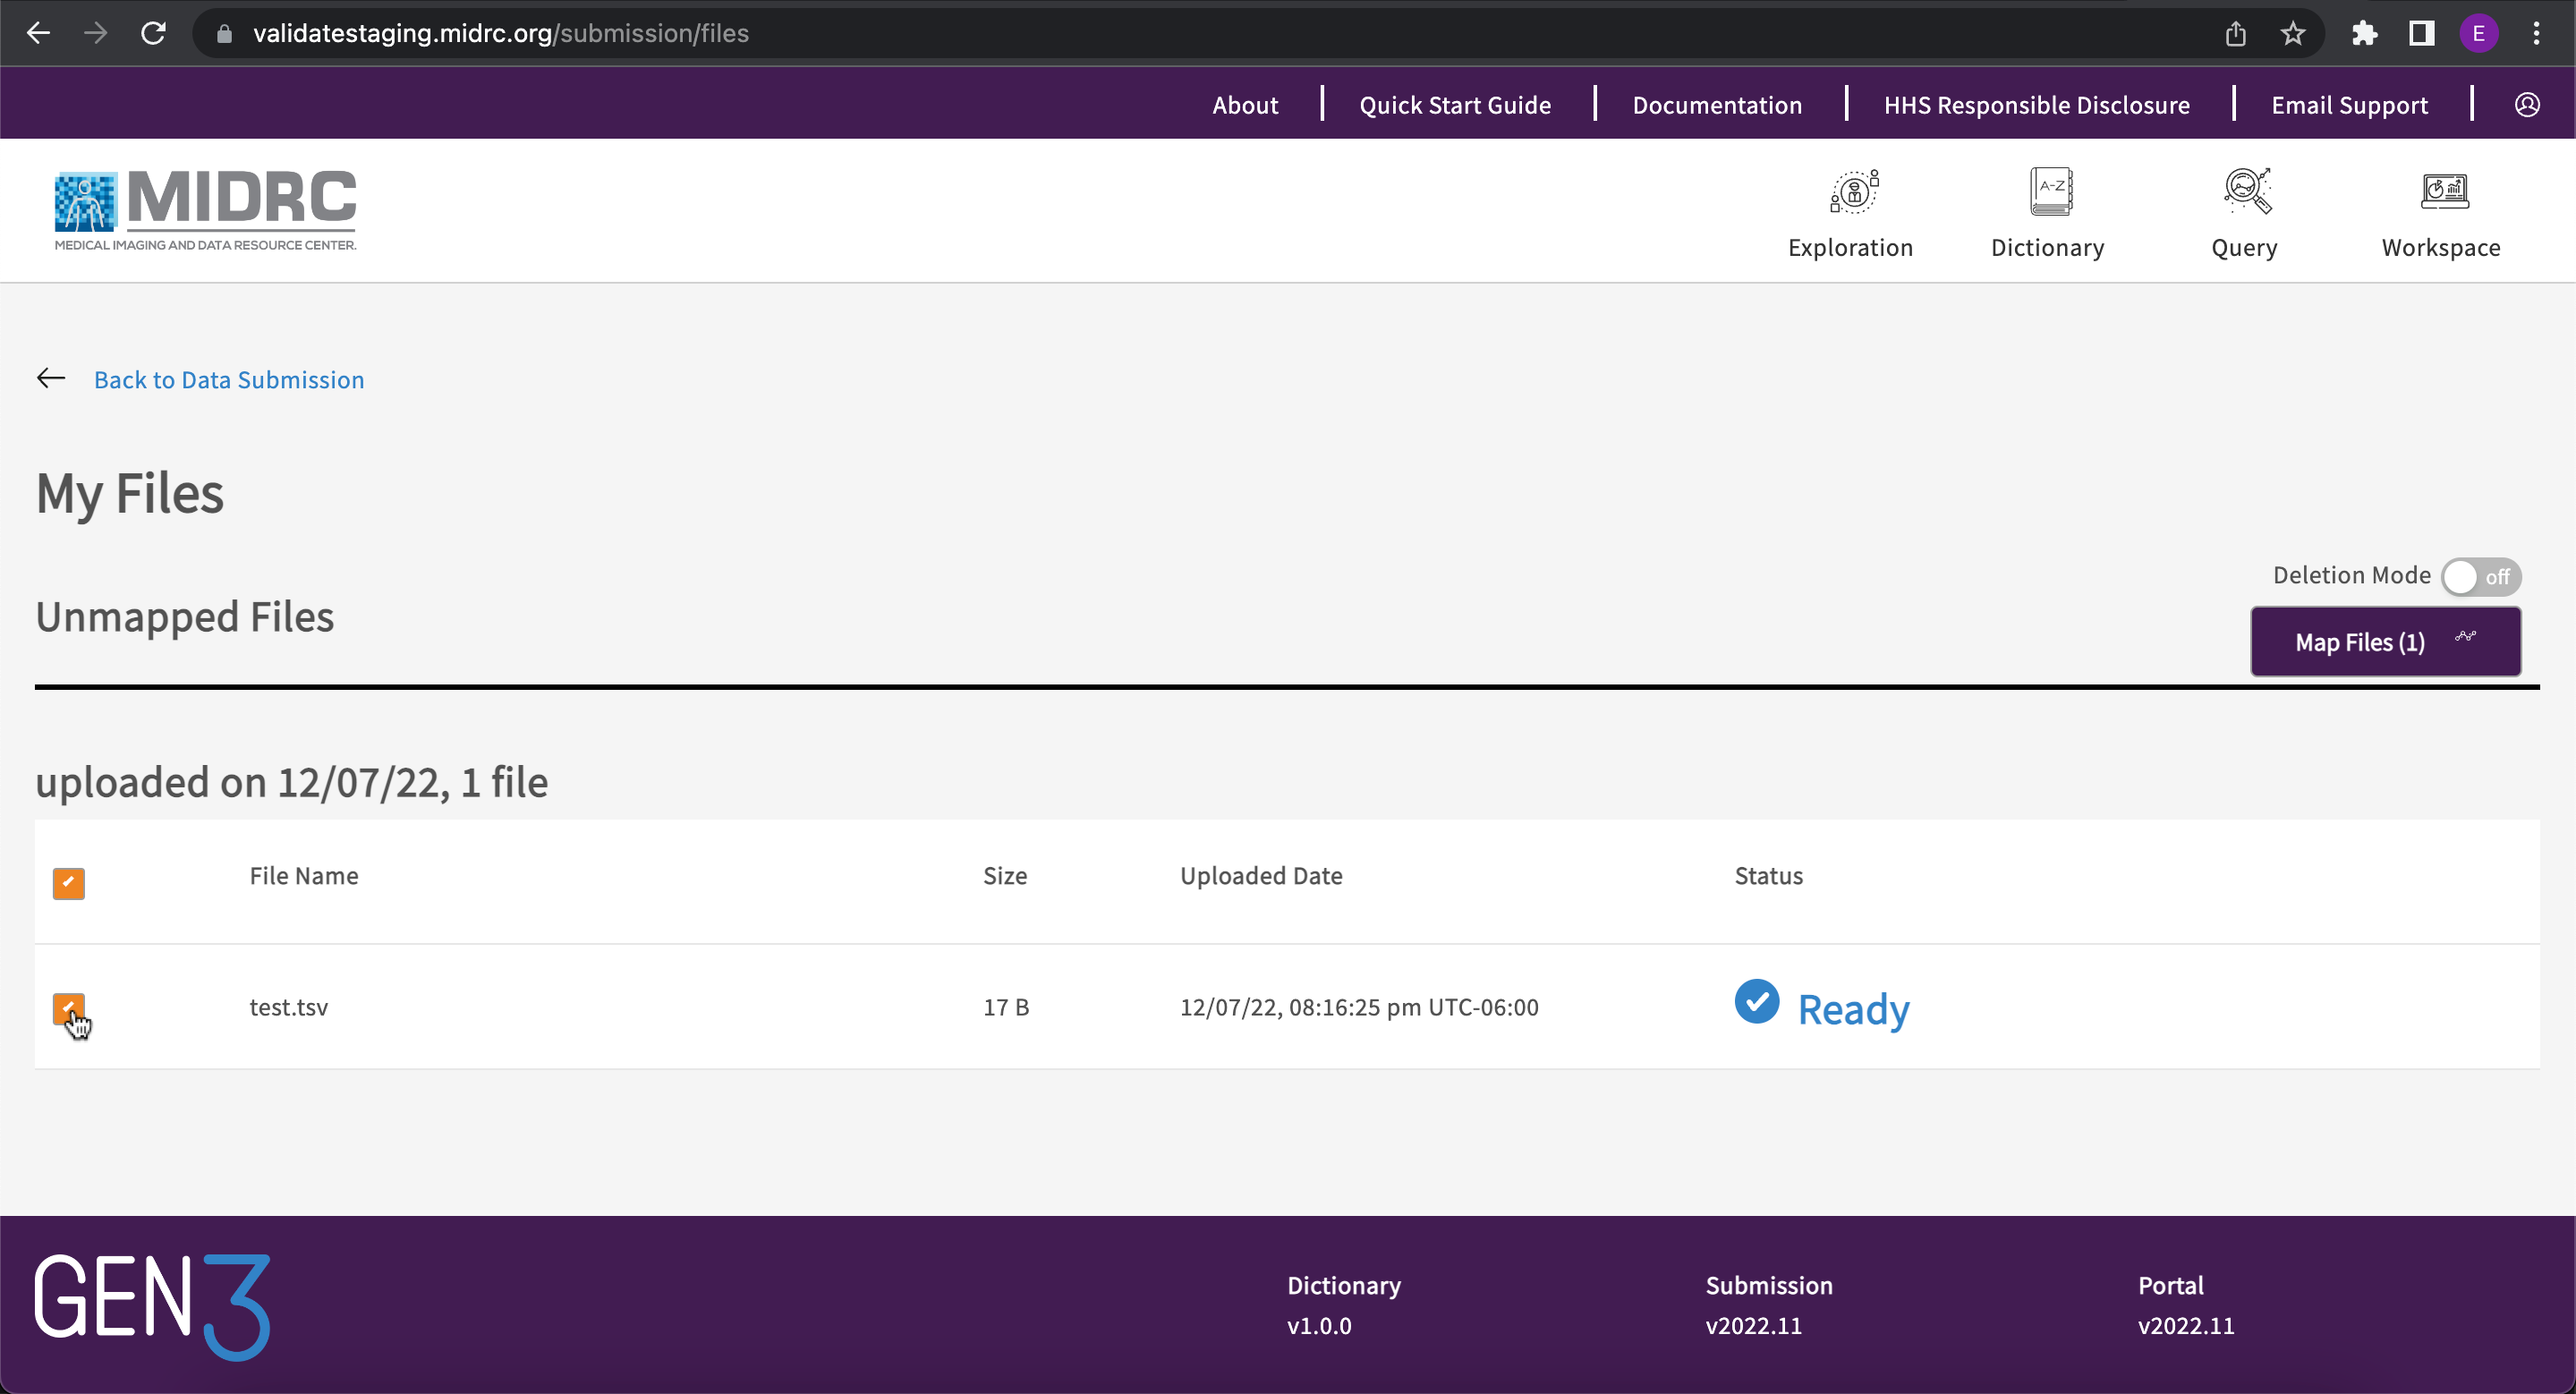


Select the file you want to map and click `'Map Files'`. This will take you to the `/submission/map` endpoint, 

You will be mapping the uploaded completed results as a supplementary file to the project "SEQ_Restricted-DT" and the appropriate core_metadata_collection node for that particular batch. For example, the file _"COMPLETED_sequestration_data_ORG_DATE.tsv"_ would be mapped to the project "SEQ_Restricted-DT" and the core_metdata_collection _"ORG_DATE"_ as a supplementary_file.

#### Required Fields:
* `data_category`: Case Sequestration Metadata
* `data_type`: Case Sequestration Metadata
* `data_format`: TSV, CSV, XSL, or XSLX. 

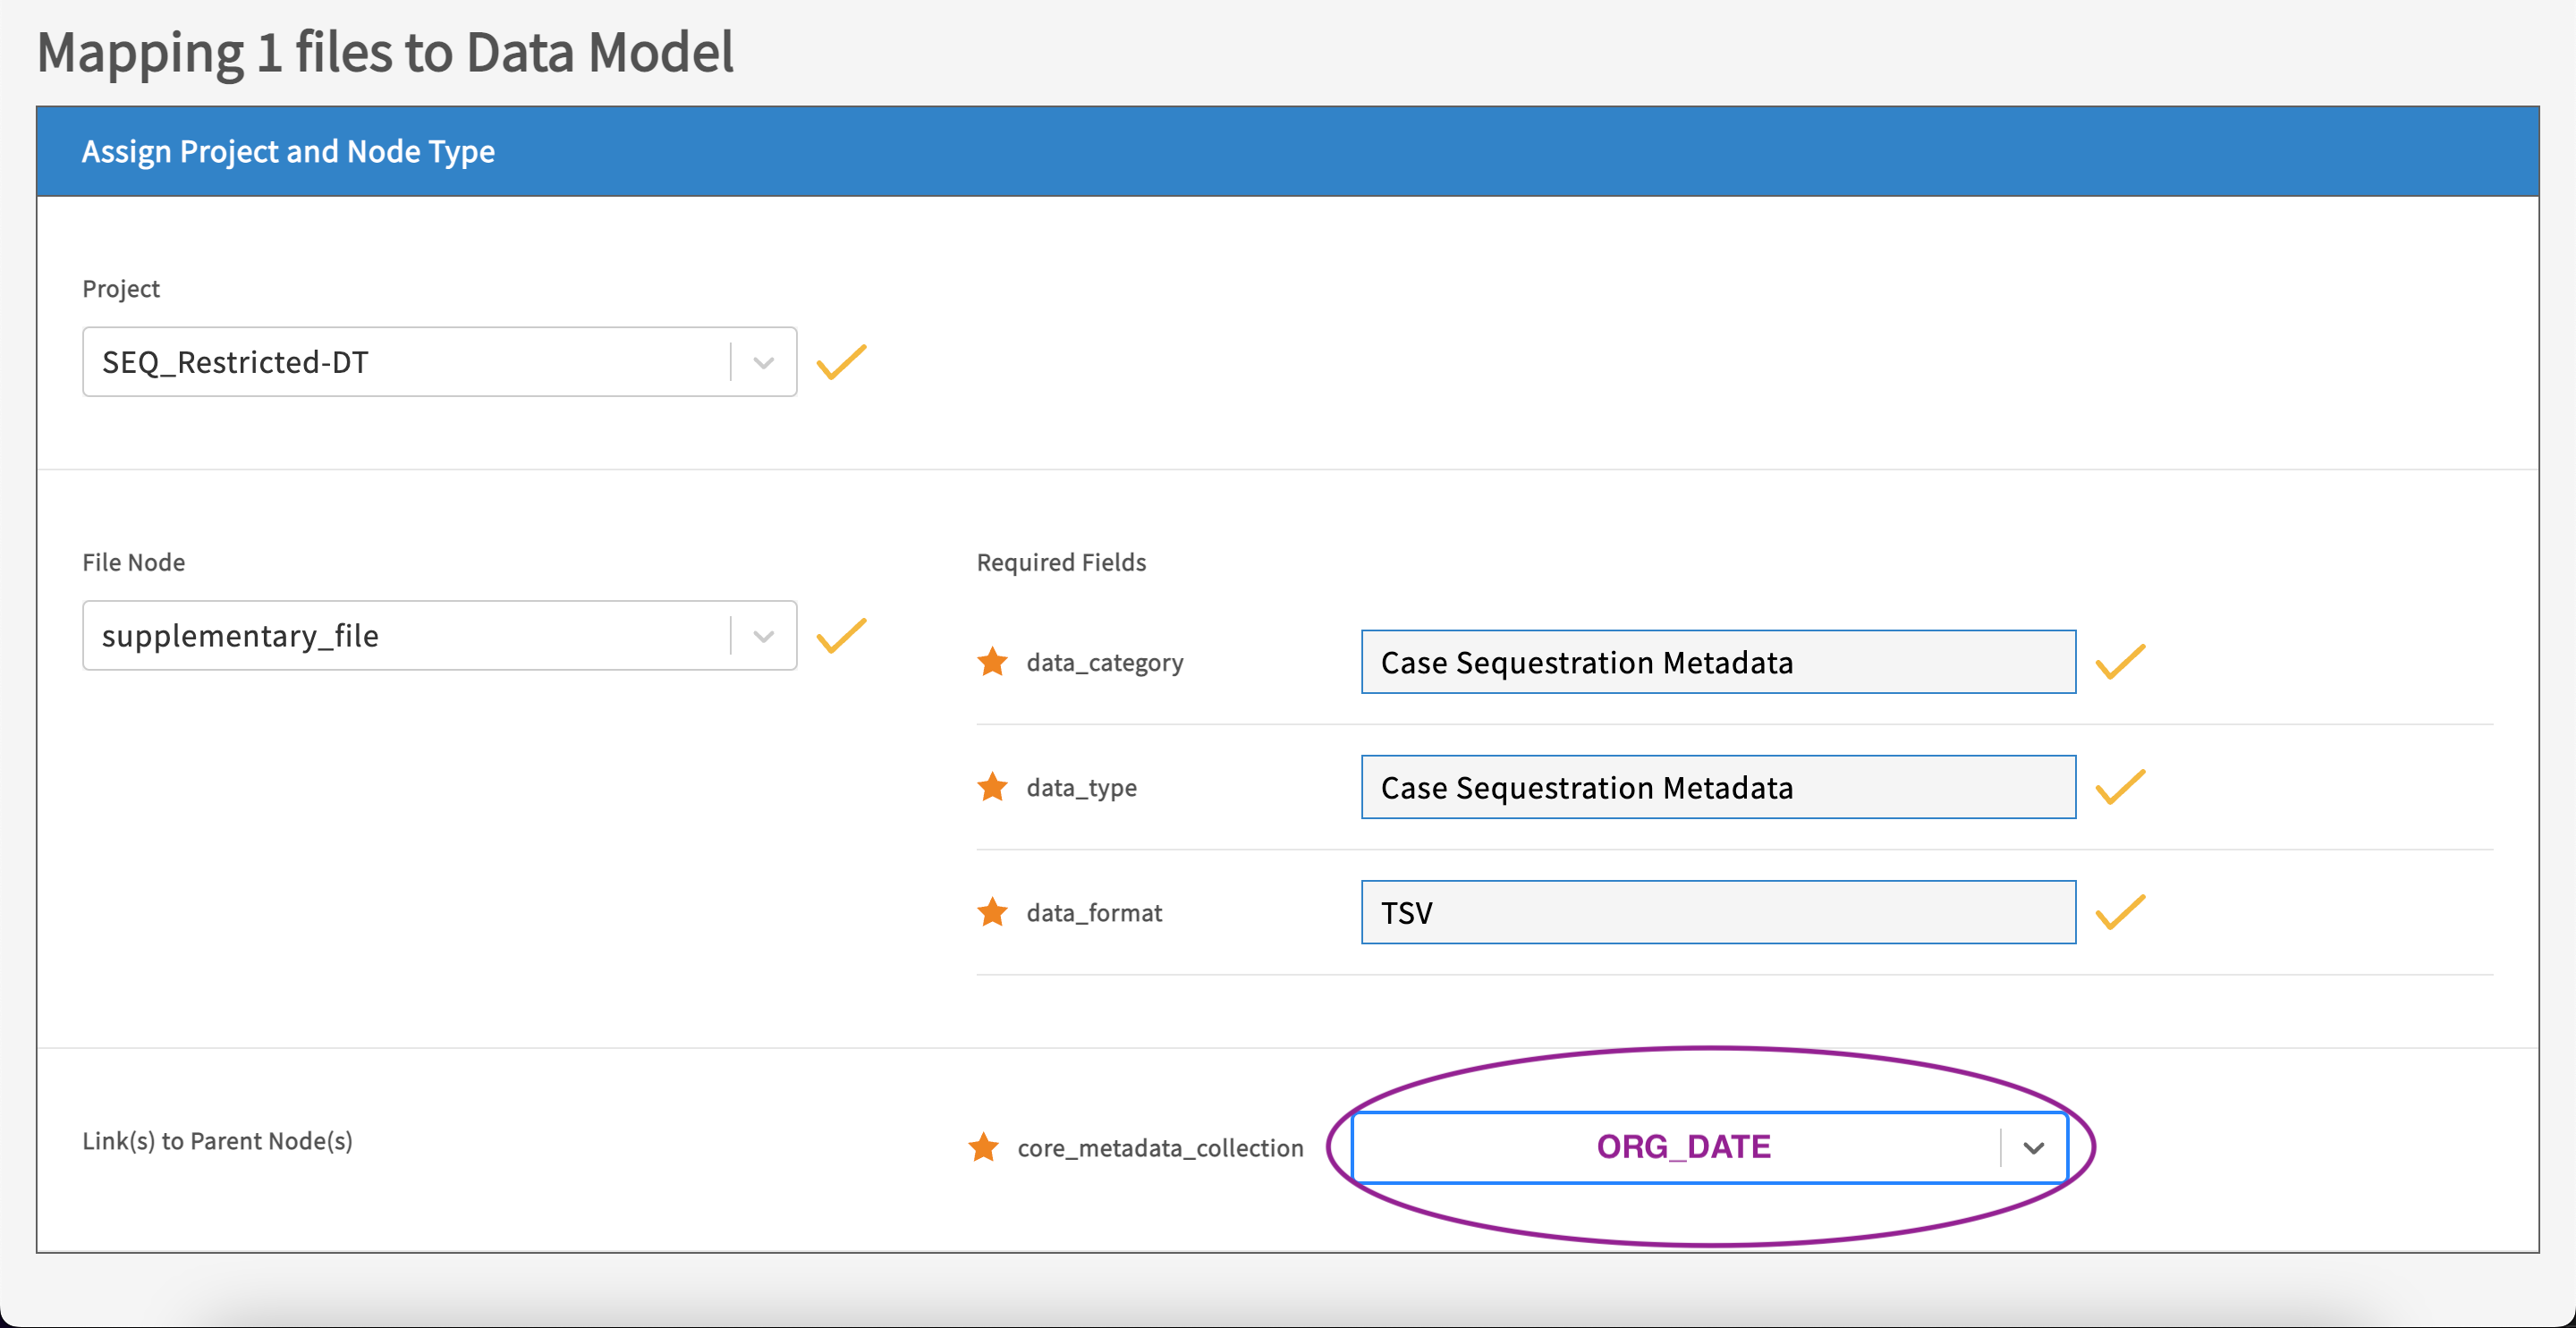


### After mapping the file, please notify Gen3-MIDRC team that the completed results are available. 

In [ ]:
print("Thank you!")